# Bank Marketing :Term Deposit Prediction  

# objective: To determine the deposit prdiction

1. Performing Exploratory Data Analysis

2. Removing outliers using zscore

3. Building Machine learning model

4. Selecting the best model using the cross validation score

5. Hypertuning the model

6. Saving the model

7. Predicting the model

# EDA

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [107]:
df1=pd.read_csv('bankdeposition.csv',sep=';')
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [108]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [109]:
df1.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [110]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [111]:
df1.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:
df1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There is no null values in the dataset

<Axes: >

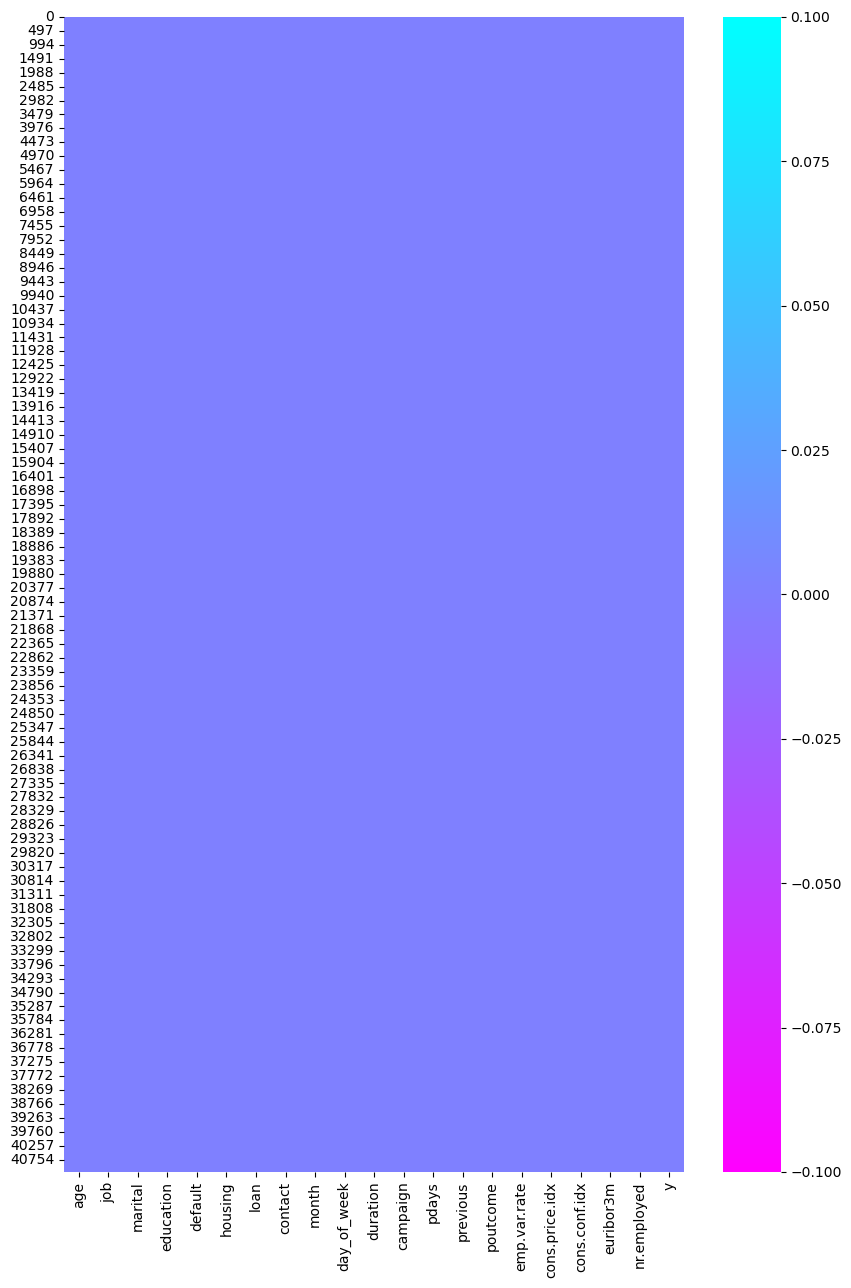

In [113]:
plt.figure(figsize=(10,15))
sns.heatmap(df1.isnull(),cmap='cool_r')

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [115]:
for i in df1.columns:
    print(df1[i].value_counts())
    print('\n')

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


no         32588
unknown     8597
yes            3
Name: default, dtype: int64


yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


no         

In [116]:
category=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]=='object':
        category.append(i)
print('Category:',category)
print('\n')

numerical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)

Category: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


Numerical Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [117]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [118]:
df1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


1. The mean is greater than median for age, duration,campaign,nr.employed so it shows right side distribution

2. The rest other shows left side distribution because the mean is less than median

3. There is sudden increase in the values between 75% and max values for age,duration,campaign which indicates may there will be some outliers
which we can confirm by boxplot

# Data Visualization

<Figure size 1000x1000 with 0 Axes>

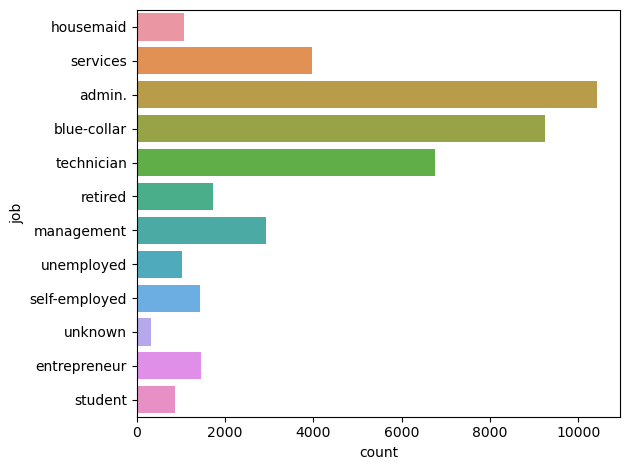

<Figure size 1000x1000 with 0 Axes>

In [119]:
sns.countplot(data=df1,y='job')
plt.tight_layout()
plt.figure(figsize=(10,10))

Admin has the highest job count followed by blue-collar and unkown has the lowes count regards to job

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


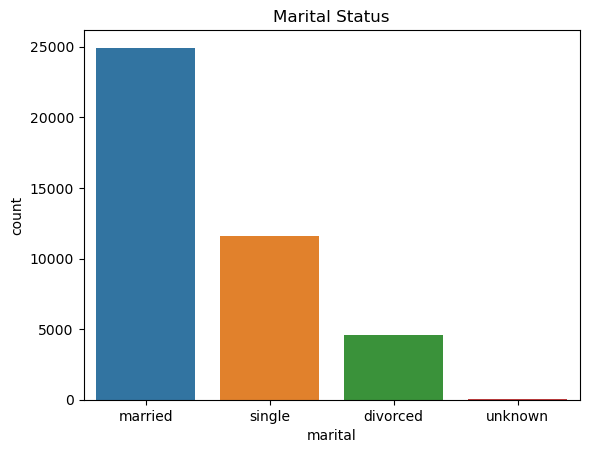

<Figure size 600x600 with 0 Axes>

In [120]:
sns.countplot(x='marital',data=df1)
plt.title('Marital Status')
plt.figure(figsize=(6,6))
print(df1['marital'].value_counts())

Married has the highes count then single one and divorced has the lowest count

<Figure size 600x300 with 0 Axes>

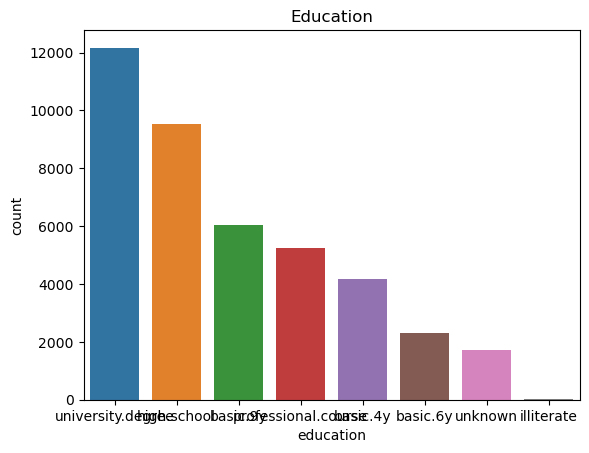

<Figure size 600x300 with 0 Axes>

In [121]:
sns.countplot(x='education',data=df1,order=df1['education'].value_counts().index)
plt.title('Education')
plt.figure(figsize=(6,3))

The university has the highest count in education and illiterate has the lowest count

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

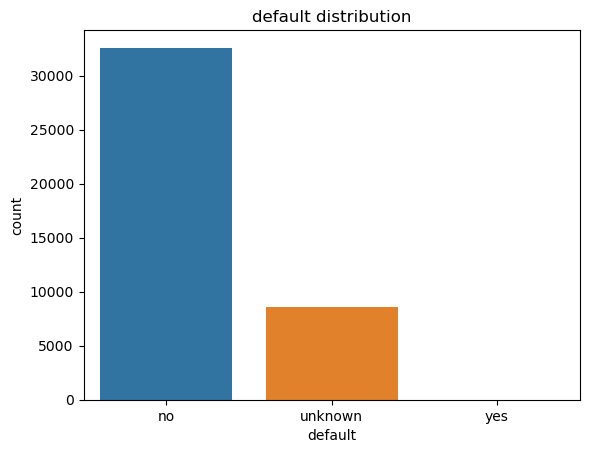

<Figure size 600x600 with 0 Axes>

In [122]:
sns.countplot(data=df1,x='default')
plt.title('default distribution')
plt.figure(figsize=(6,6))
df1['default'].value_counts()

Most of coustomer has no default where as very less coustomer with unknown default and no coustomer has yes as default

<Figure size 600x300 with 0 Axes>

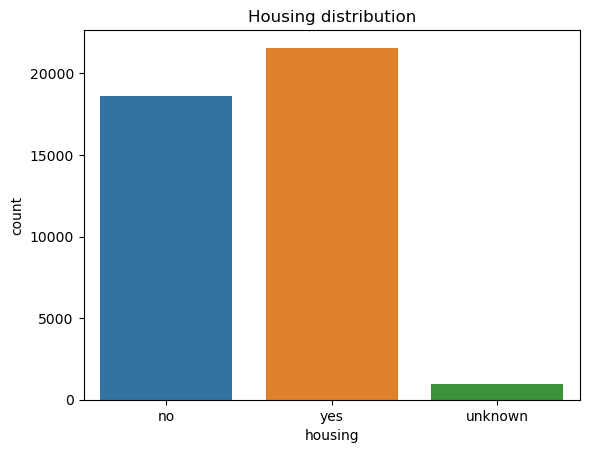

<Figure size 600x300 with 0 Axes>

In [123]:
sns.countplot(data=df1,x='housing')
plt.title('Housing distribution')
plt.figure(figsize=(6,3))

From the above graph we can conclude that the most of coustomer have the housing loan comapred to some coustomer which have no housing loan

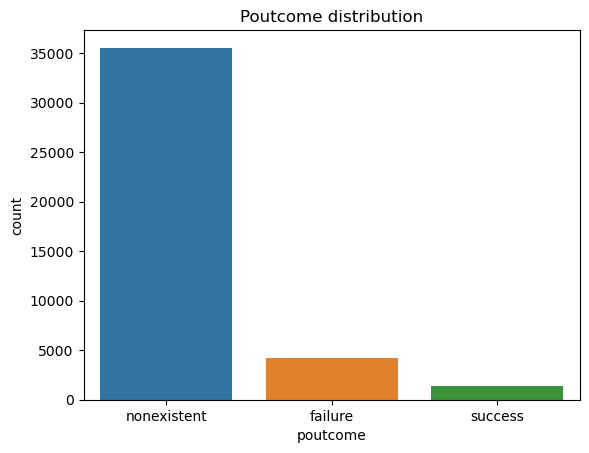

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [124]:
sns.countplot(data=df1,x='poutcome')
plt.title('Poutcome distribution')
plt.show()
df1['poutcome'].value_counts()

1. From the above countplot we can see that most of the coustomer do not have idea about the poutcome amongst which nonexistent have the highest count

2. The failure has less count compared to nonexistent

3. sucess has the lowest count in the poutcome

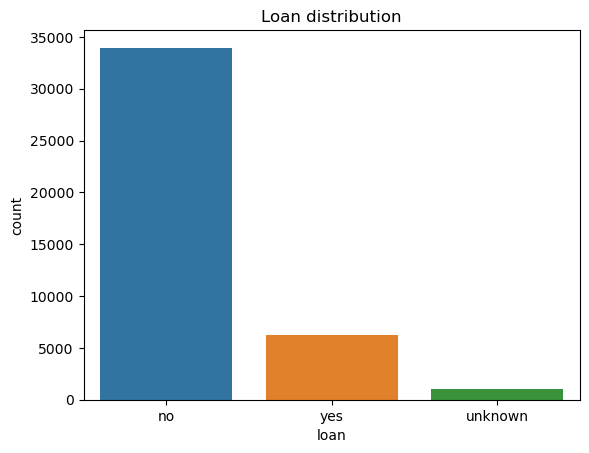

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [125]:
sns.countplot(x='loan',data=df1)
plt.title('Loan distribution')
plt.show()
df1['loan'].value_counts()

From the above plot we can see that the most of the individuals not have the personal loan while some of them having personal loan

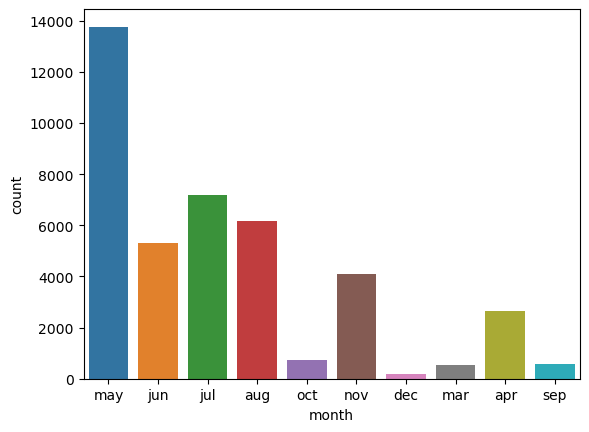

In [126]:
sns.countplot(x='month',data=df1)
df1['month'].value_counts()
plt.show()

The above plot shows that in May,June,July and August month coustomer have higher contact frequency where and sep,oct,nov have less contact frequency

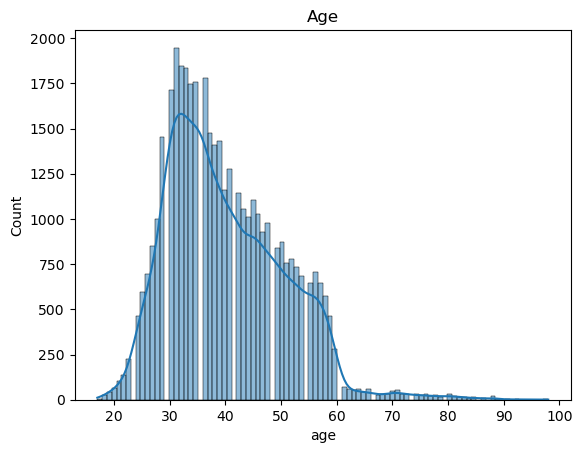

In [127]:
sns.histplot(data=df1,x='age',kde=True)
plt.title('Age')
plt.show()

The above histogram shows that the age of the coustomer is between 25-60 and there is more number of coustomer in the range 25-60 than older age coustomer

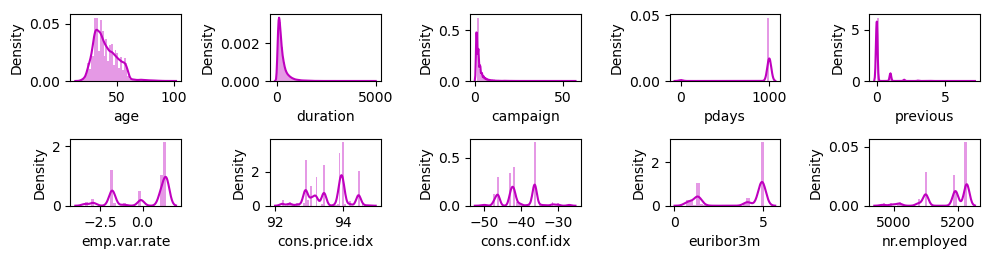

In [128]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=10:
        a1=plt.subplot(5,5,plotnumber)
        sns.distplot(df1[col],color='m')
        plt.xlabel(col)
        plt.yticks()
    plotnumber+=1
plt.tight_layout()

The above histogram shows following observations:
    
1. Age: The age of coustomer which shows right skewed distribution
    
2. Duration shows left side skewed distribution

3. Campaign shows left side distribution

4. Previous shows left side skewed distribution

# Bivariate analysis

<Axes: xlabel='education', ylabel='count'>

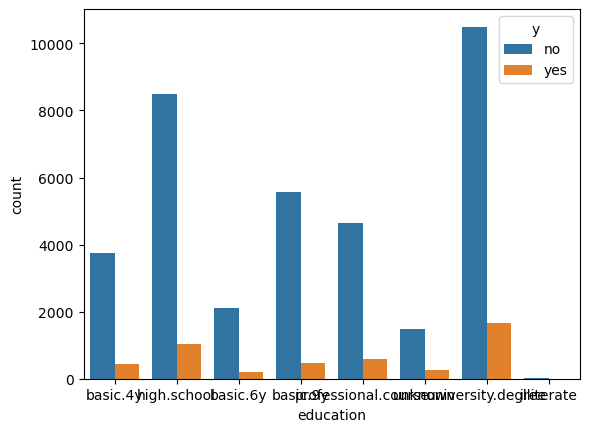

In [130]:
sns.countplot(data=df1,x='education',hue='y')

The plot shows that the blue-collar, management have the higher number comapred to others

<Axes: xlabel='day_of_week', ylabel='duration'>

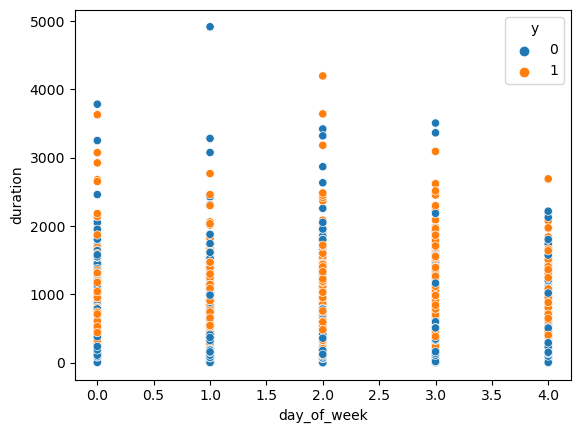

In [183]:
sns.scatterplot(data=df1,x='day_of_week',y='duration',hue='y')

Scatterplot shows that the 1st day of week has the higher number and 4th day has the lowest number

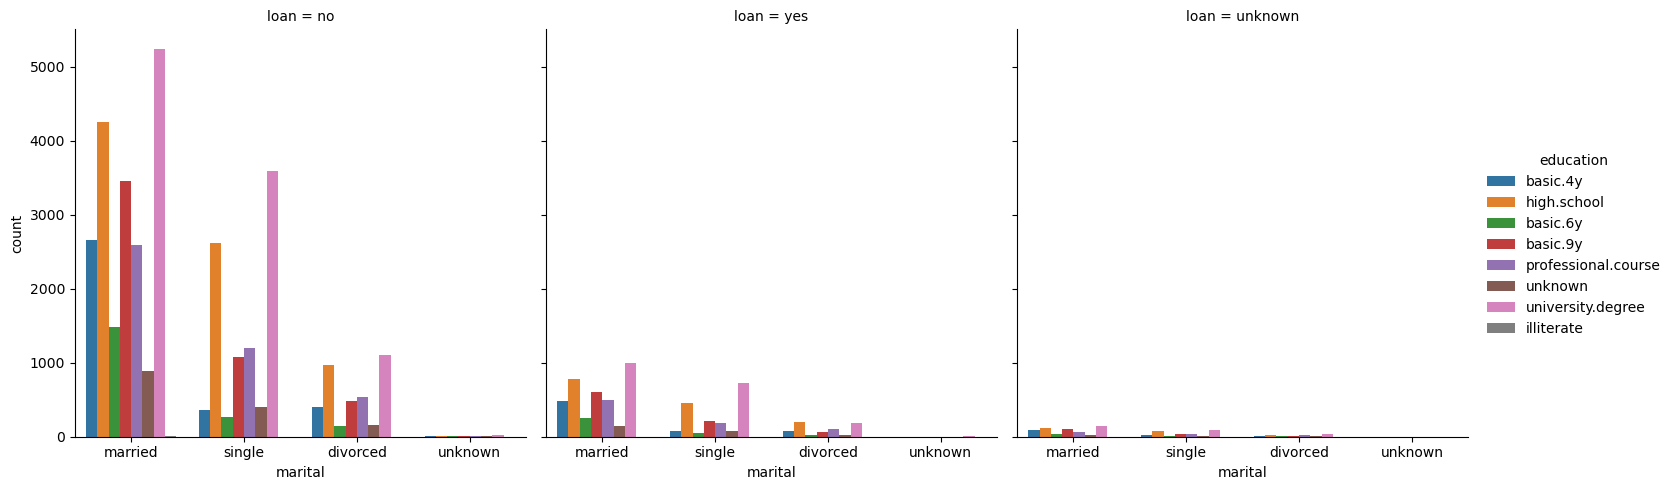

In [132]:
sns.catplot(x='marital',hue='education',col='loan',data=df1,kind='count')

1.The above categorical plot shows that the people with university degree have no loan when they are married

2. People who are single have no loan with their university degree

3. People with the married status and have university degree have loans followed by single people when they have loans 

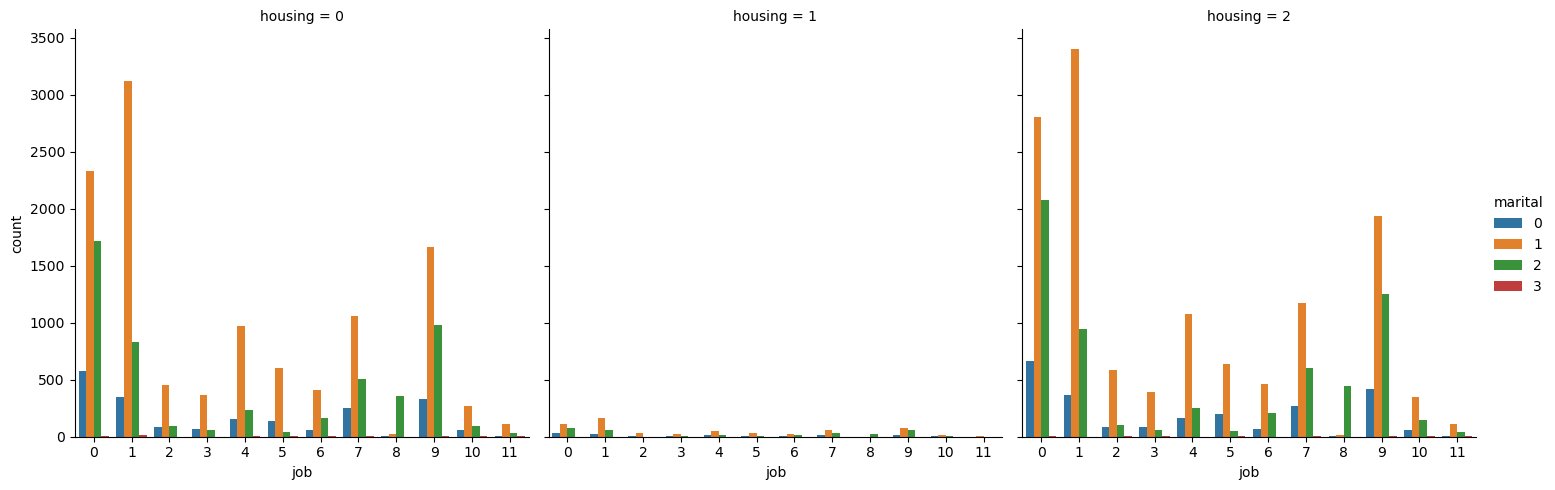

In [185]:
sns.catplot(data=df1,x='job',hue='marital',col='housing',kind='count')

1. The above catplot shows that the people who are married have housing loan comapred to people who do not have loan

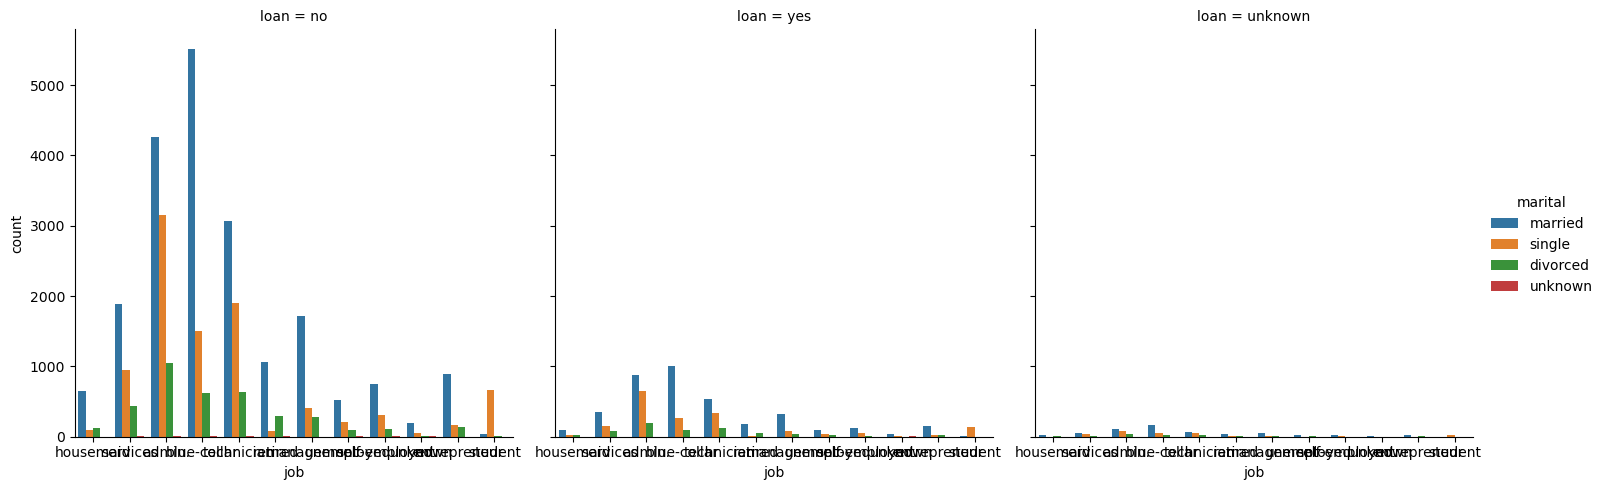

In [134]:
sns.catplot(data=df1,x='job',hue='marital',col='loan',kind='count')

1.The plot shows the count of coustomer by job type and differentiated by marital status and whether they have personal loan

2. The 'No' is higher compared to 'yes'

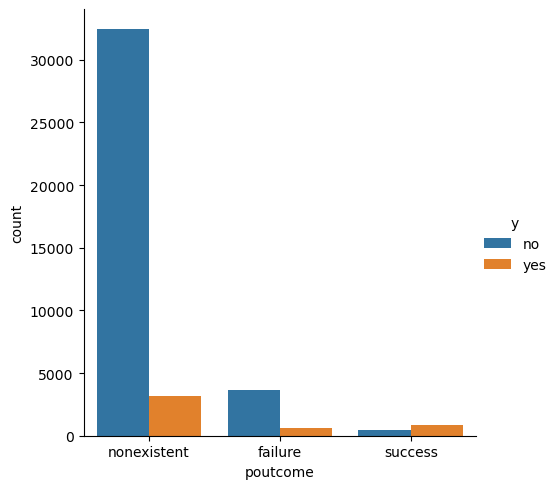

In [135]:
sns.catplot(x='poutcome',hue='y',data=df1,kind='count')

The plot shows that the 'No' rate is higher compared to 'yes' which indicates low success rate

<Axes: xlabel='default', ylabel='count'>

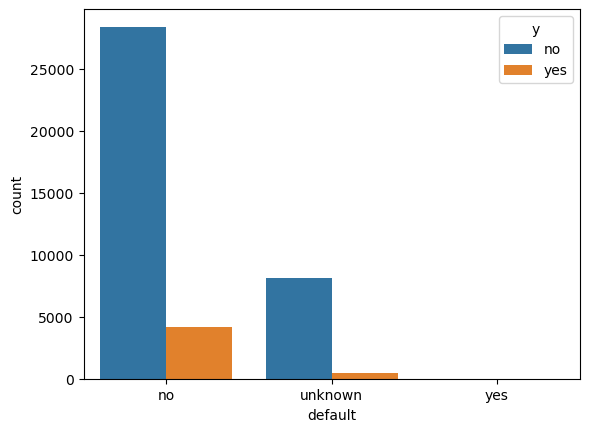

In [136]:
sns.countplot(data=df1,x='default',hue='y')

1.The plot shows the number of coustomers based on their credit in default and susbcription status to term deposit

2. The 'No' susbscription rate is higher compared to 'Yes' which denotes lower success rate

# Multivariate Analysis

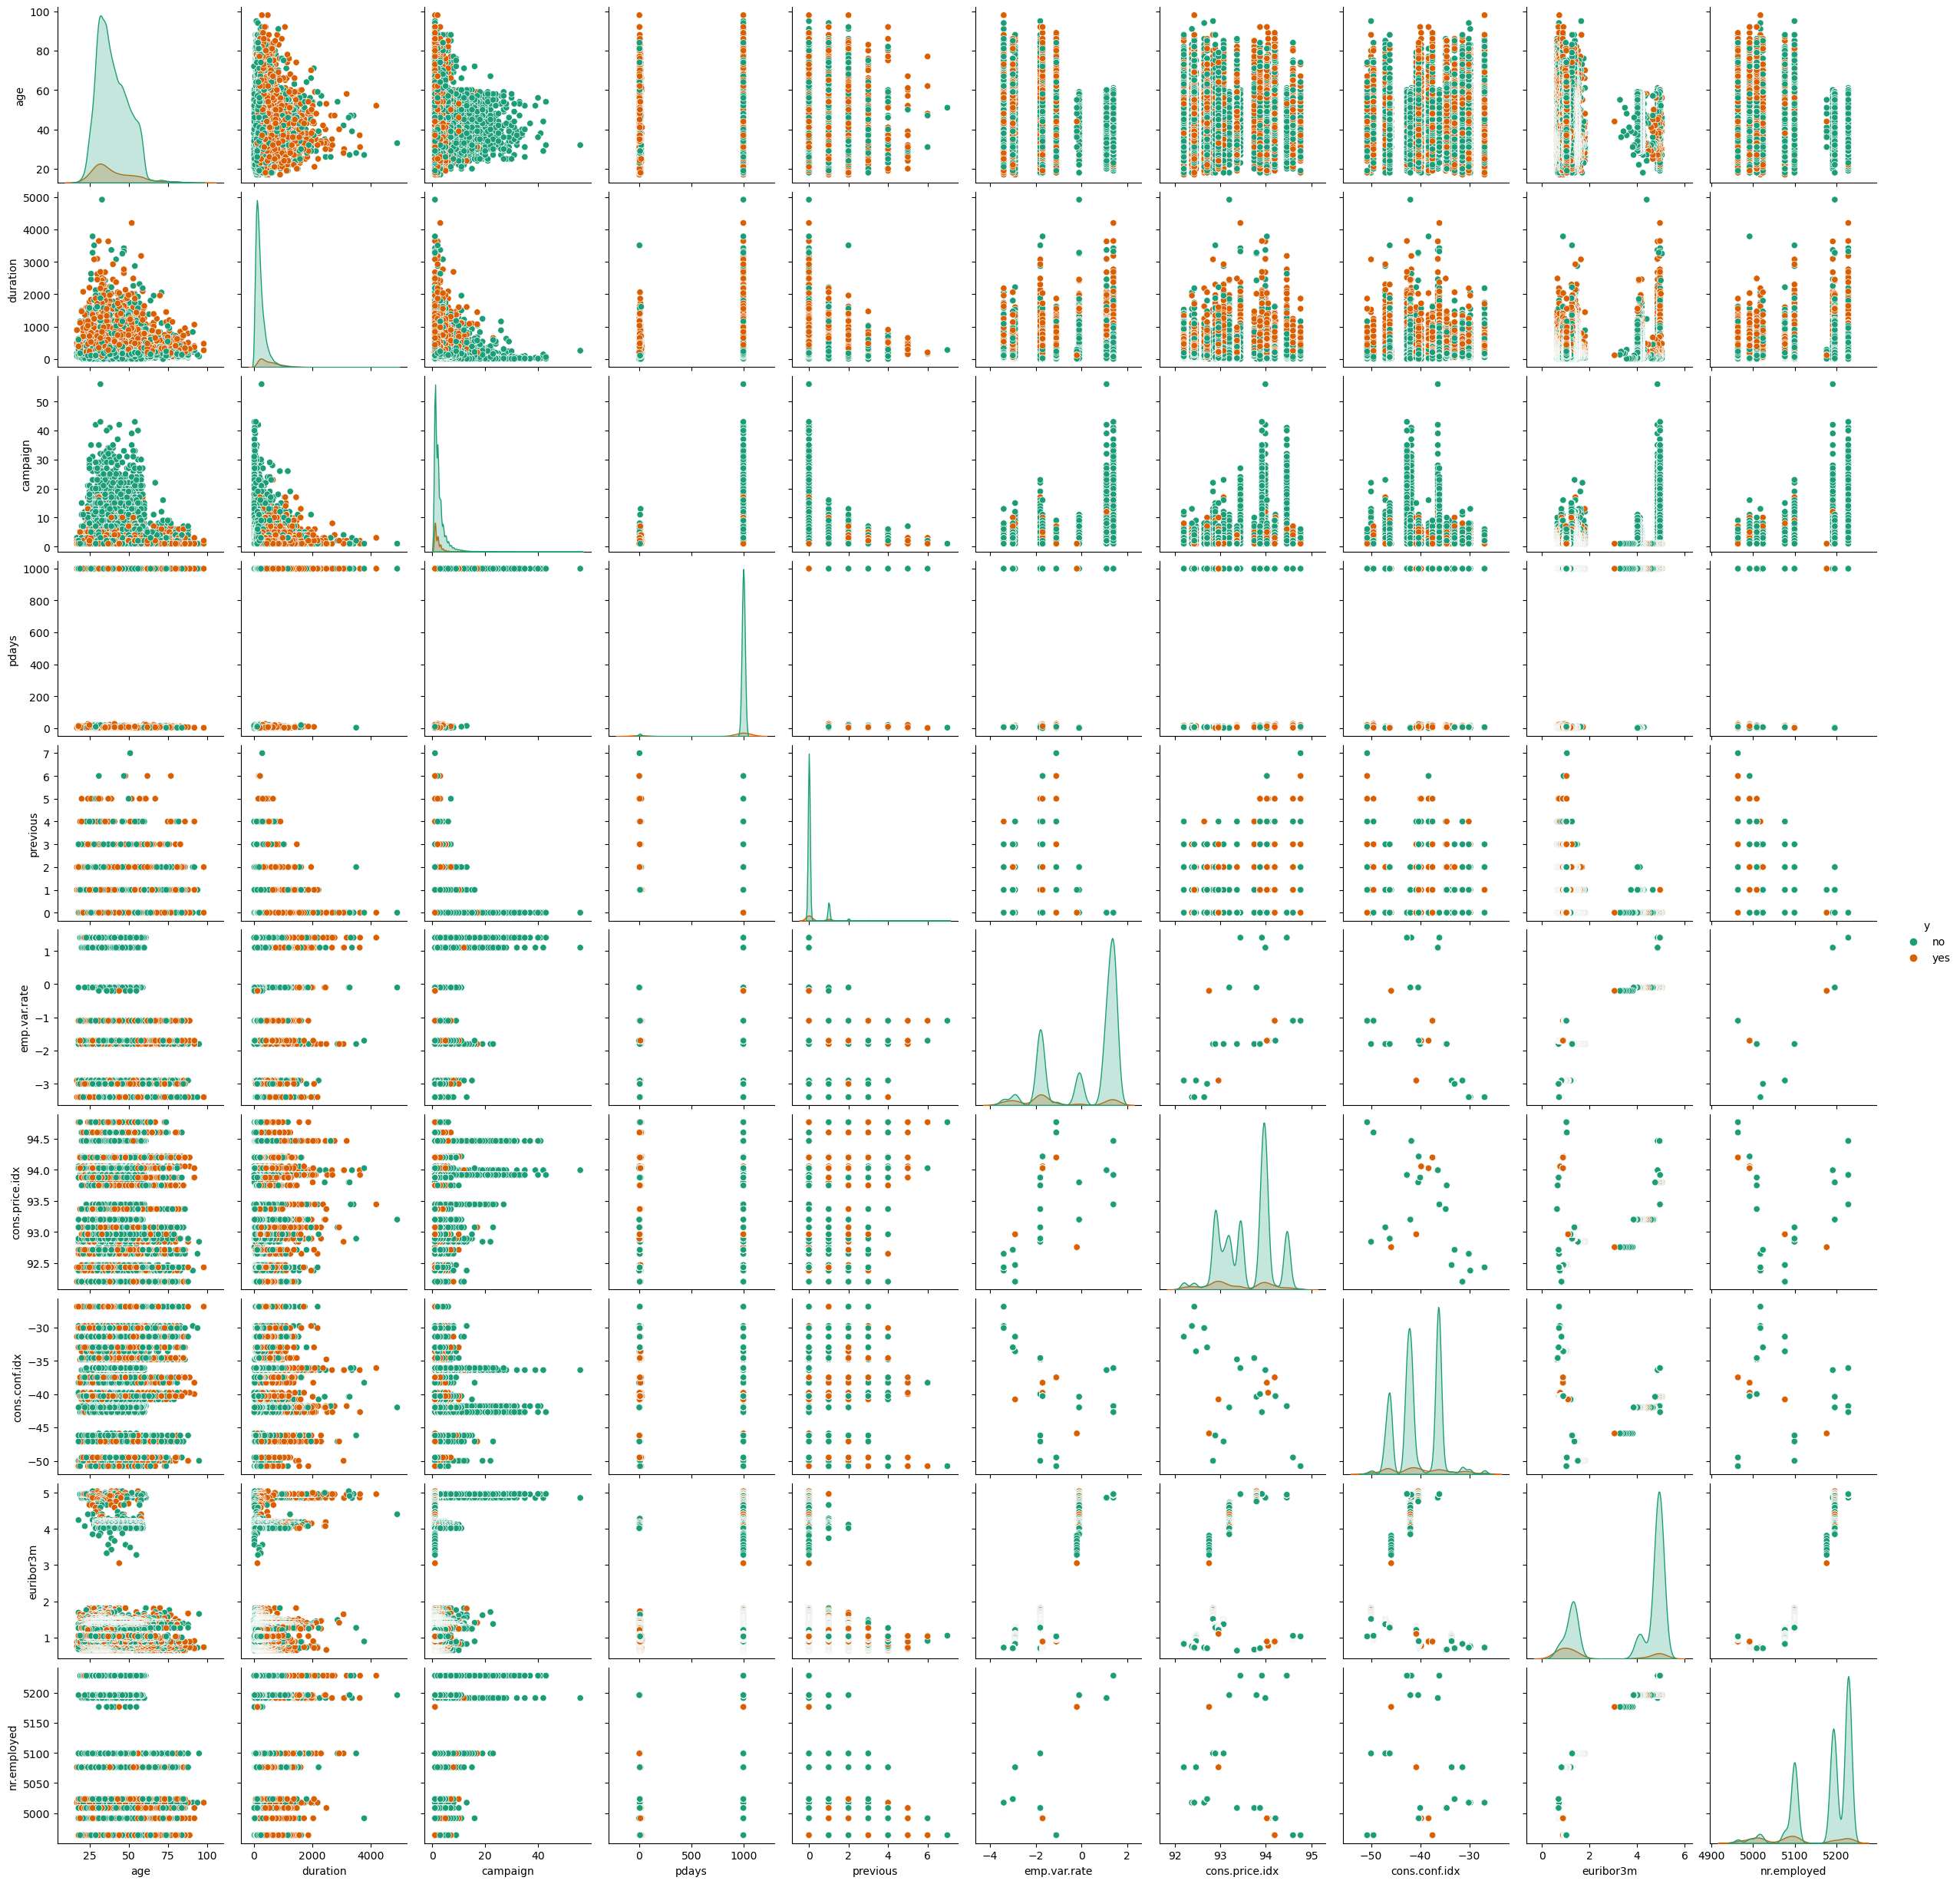

In [137]:
sns.pairplot(data=df1,hue='y',palette='Dark2')

1. The previous has left side skewed data

2. Duration and campgain has negative correlation

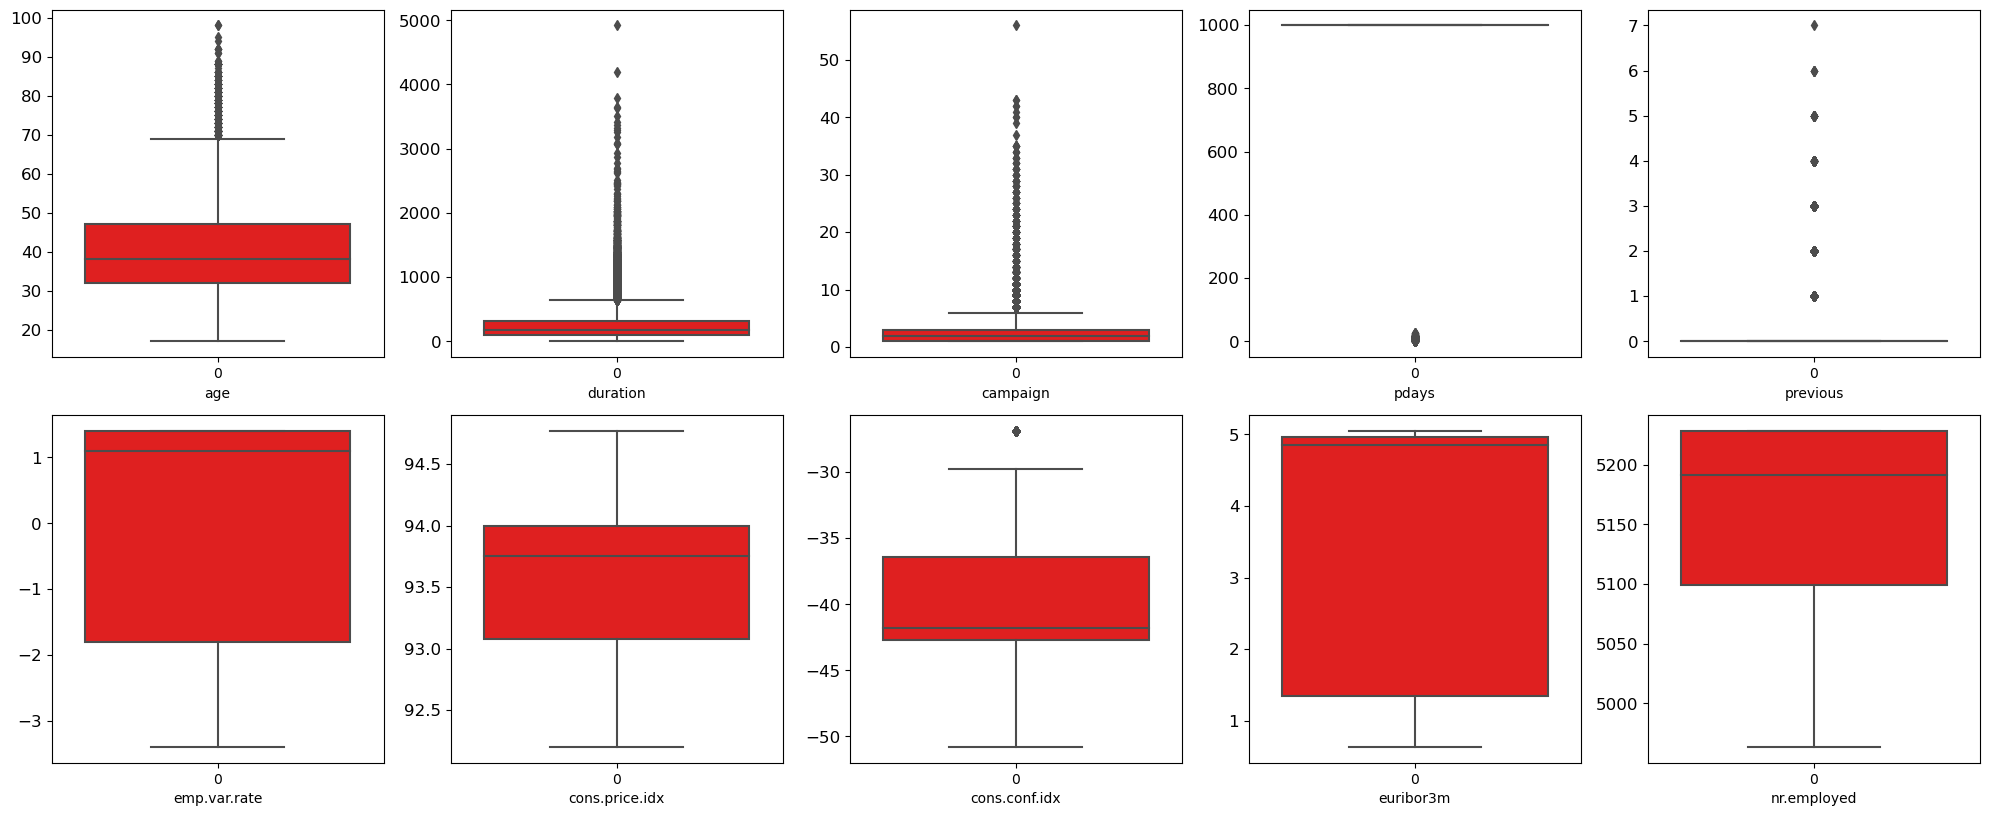

In [138]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=10:
        ay=plt.subplot(5,5,plotnumber)
        sns.boxplot(df1[col],color='r')
        plt.xlabel(col)
        plt.yticks(fontsize=12)
    plotnumber+=1
plt.tight_layout()

The above boxplot shows that the Age,Duration, campaign, previous has the outliers which we can be remove using zsccore

In [139]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['y']=le.fit_transform(df1['y'])


In [140]:
df1['job']=le.fit_transform(df1['job'])
df1['marital']=le.fit_transform(df1['marital'])
df1['education']=le.fit_transform(df1['education']) 
df1['default']=le.fit_transform(df1['default'])
df1['housing']=le.fit_transform(df1['housing'])
df1['loan']=le.fit_transform(df1['loan'])
df1['contact']=le.fit_transform(df1['contact'])
df1['month']=le.fit_transform(df1['month'])
df1['day_of_week']=le.fit_transform(df1['day_of_week'])
df1['poutcome']=le.fit_transform(df1['poutcome'])


In [141]:
df1.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,...,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,...,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,...,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,...,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,...,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,...,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,...,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,...,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,...,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,...,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


<Axes: >

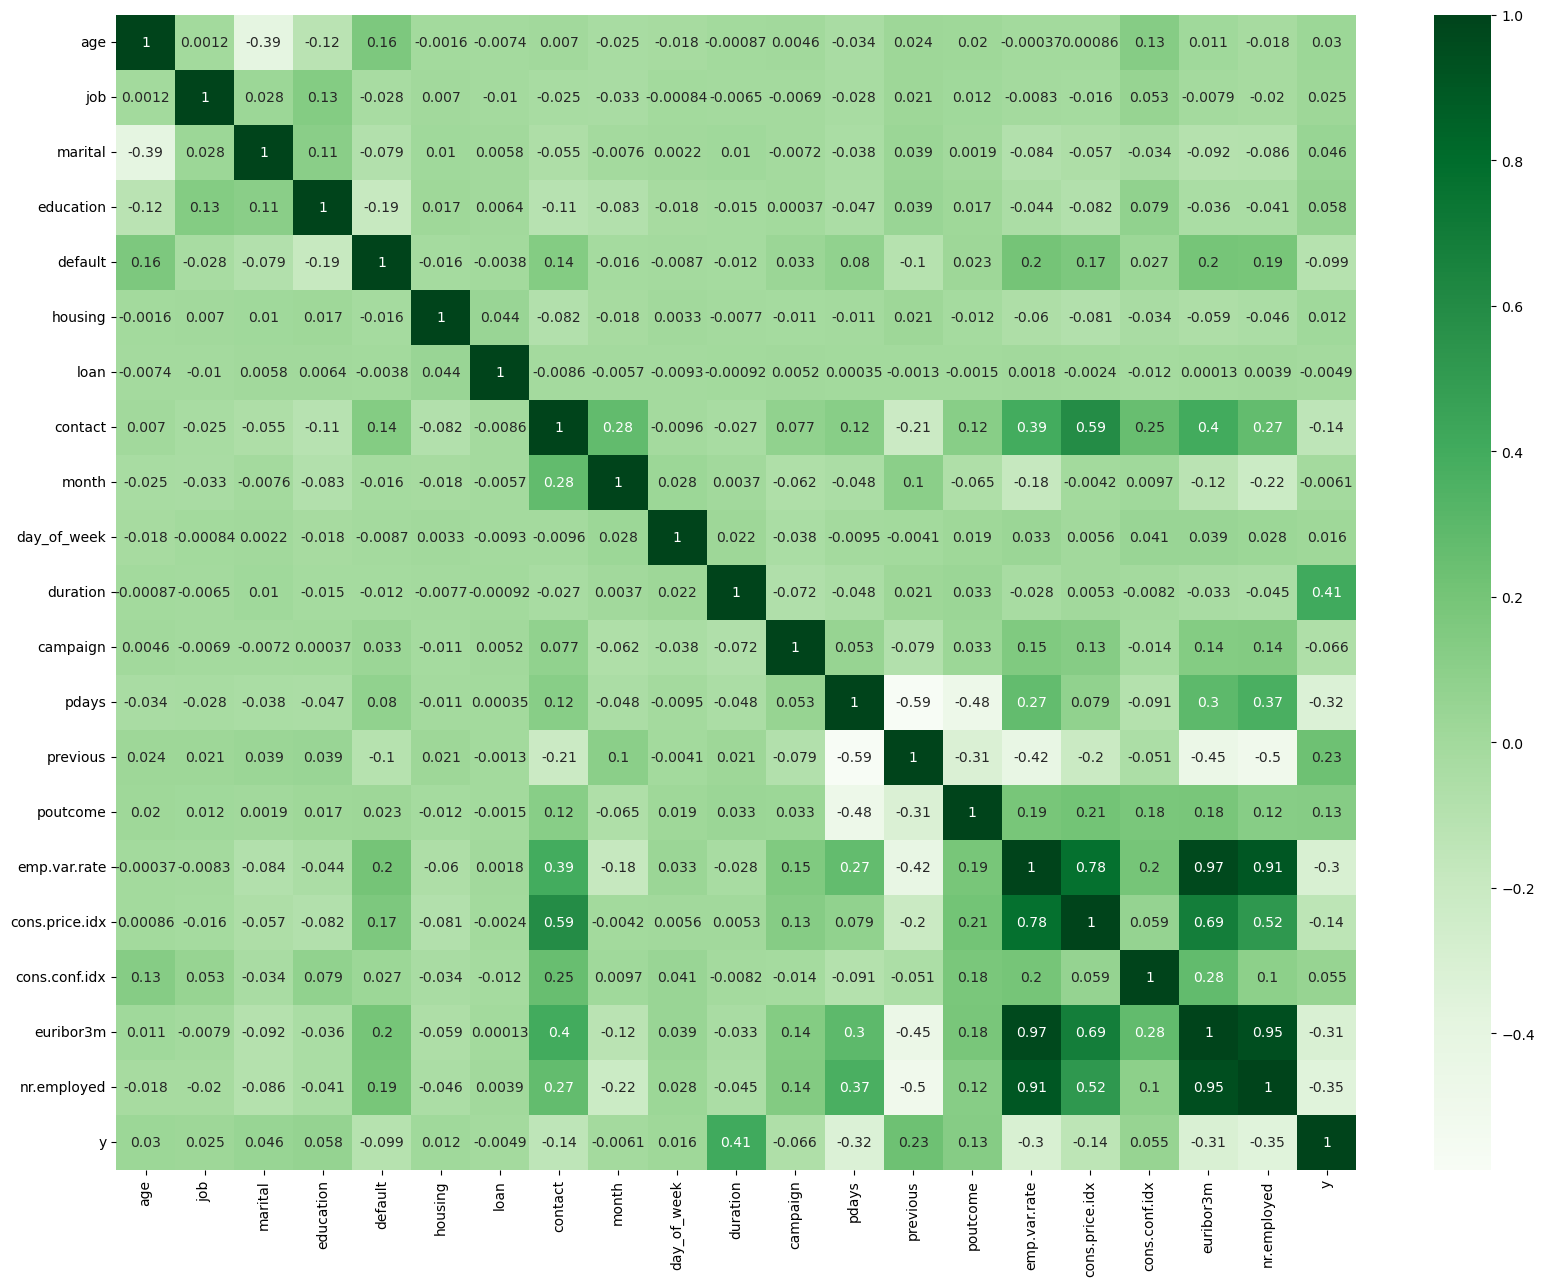

In [142]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot=True,cmap='Greens')

1. Emp.var,rate and cons.price.idx has the positive correlation with each other

2. Euribor3m and nr.employed has the verynpositive correlation with each other

3. housing, loan and contact month has the positive correlation with each other

4.pdays and previous ahs the very negative correlation with each other

5. Education,default and default housing has the negative correlation with each other

6.Campaign, default and contact give negative values to the outcome

In [143]:
df1.drop('loan',axis=1,inplace=True)
df1.drop('default',axis=1,inplace=True)
df1.drop('month',axis=1,inplace=True)

In [144]:
from scipy.stats import zscore
dfscore=np.abs(zscore(df1))
print(np.where(dfscore>3))

(array([   37,    40,    75, ..., 41182, 41183, 41187], dtype=int64), array([7, 2, 7, ..., 9, 0, 0], dtype=int64))


In [145]:
dfn=df1[(dfscore<3).all(axis=1)]
dfn

,age,job,marital,education,housing,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,1,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,1,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,2,1,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,1,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,0,1,6,0,0,0,254,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41181,37,0,1,6,2,0,0,281,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,2,0,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [146]:
df1.shape

(41188, 18)

In [147]:
dfn.shape

(37247, 18)

In [148]:
x=dfn.iloc[:,:-1]
x

,age,job,marital,education,housing,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,1,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,0,1,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,2,1,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,1,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,1,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,0,1,6,0,0,0,254,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41181,37,0,1,6,2,0,0,281,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,2,0,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [149]:
y=dfn.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
41180    0
41181    1
41184    0
41185    0
41186    1
Name: y, Length: 37247, dtype: int32

In [150]:
y.value_counts()

0    34285
1     2962
Name: y, dtype: int64

In [151]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

Defaulting to user installation because normal site-packages is not writeable


In [152]:
y1.value_counts()

0    34285
1    34285
Name: y, dtype: int64

# Machine Leraning Model

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.9641242525885956 at random_state 9


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [155]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
etpred=ET.predict(x_test)
print(accuracy_score(y_test,etpred))
print(classification_report(y_test,etpred))
print(confusion_matrix(y_test,etpred))

0.9605269554226824
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     10292
           1       0.95      0.97      0.96     10279

    accuracy                           0.96     20571
   macro avg       0.96      0.96      0.96     20571
weighted avg       0.96      0.96      0.96     20571

[[9779  513]
 [ 299 9980]]


In [156]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predrfc=RFC.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.9611589130329105
[[9778  514]
 [ 285 9994]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     10292
           1       0.95      0.97      0.96     10279

    accuracy                           0.96     20571
   macro avg       0.96      0.96      0.96     20571
weighted avg       0.96      0.96      0.96     20571



In [157]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abcpred=abc.predict(x_test)
print(accuracy_score(y_test,abcpred))
print(confusion_matrix(y_test,abcpred))
print(classification_report(y_test,abcpred))

0.9126440134169462
[[9407  885]
 [ 912 9367]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10292
           1       0.91      0.91      0.91     10279

    accuracy                           0.91     20571
   macro avg       0.91      0.91      0.91     20571
weighted avg       0.91      0.91      0.91     20571



In [158]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
lrpred=LR.predict(x_test)
print("Accuracy Score is:" ,accuracy_score(y_test,lrpred))
print("Confsuion matrix is:",confusion_matrix(y_test,lrpred))
print("Classification report is:",classification_report(y_test,lrpred))

Accuracy Score is: 0.857809537698702
Confsuion matrix is: [[8695 1597]
 [1328 8951]]
Classification report is:               precision    recall  f1-score   support

           0       0.87      0.84      0.86     10292
           1       0.85      0.87      0.86     10279

    accuracy                           0.86     20571
   macro avg       0.86      0.86      0.86     20571
weighted avg       0.86      0.86      0.86     20571



In [159]:
svc=SVC()
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.8443925915123232
[[8446 1846]
 [1355 8924]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     10292
           1       0.83      0.87      0.85     10279

    accuracy                           0.84     20571
   macro avg       0.85      0.84      0.84     20571
weighted avg       0.85      0.84      0.84     20571



In [160]:

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print(accuracy_score(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))
print(classification_report(y_test,dtcpred))

0.9397209664090224
[[9623  669]
 [ 571 9708]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10292
           1       0.94      0.94      0.94     10279

    accuracy                           0.94     20571
   macro avg       0.94      0.94      0.94     20571
weighted avg       0.94      0.94      0.94     20571



In [161]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))

0.9224636624374118
[[ 8798  1494]
 [  101 10178]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     10292
           1       0.87      0.99      0.93     10279

    accuracy                           0.92     20571
   macro avg       0.93      0.92      0.92     20571
weighted avg       0.93      0.92      0.92     20571



In [162]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnbpred=gnb.predict(x_test)
print(accuracy_score(y_test,gnbpred))
print(confusion_matrix(y_test,gnbpred))
print(classification_report(y_test,gnbpred))

0.832288172670264
[[8463 1829]
 [1621 8658]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     10292
           1       0.83      0.84      0.83     10279

    accuracy                           0.83     20571
   macro avg       0.83      0.83      0.83     20571
weighted avg       0.83      0.83      0.83     20571



In [163]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,predrfc)-score.mean())

[0.78131836 0.70110836 0.93495698 0.59092898 0.56132419]
0.7139273734869477
0.24723153954596278


# Cross Validation 

In [164]:
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,etpred)-score.mean())

[0.79079772 0.70205629 0.95486364 0.599825   0.56664722]
0.7228379757911623
0.23768897963152014


In [165]:
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,lrpred)-score.mean())

[0.85759078 0.90287298 0.89171649 0.8368091  0.57969958]
0.8137377862038793
0.044071751494822786


In [166]:
score=cross_val_score(dtc,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,dtcpred)-score.mean())

[0.57525157 0.69170191 0.86284089 0.58400175 0.58050168]
0.6588595595741578
0.2808614068348646


In [167]:
score=cross_val_score(knn,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,knnpred)-score.mean())

[0.89412279 0.94363424 0.94326965 0.82025667 0.70358757]
0.8609741869622285
0.06148947547518335


In [168]:
score=cross_val_score(gnb,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,gnbpred)-score.mean())

[0.88807058 0.92795683 0.91191483 0.76571387 0.38683098]
0.7760974186962228
0.05619075397404116


In [169]:
score=cross_val_score(abc,x1,y1)
print(score)
print(score.mean())
print(accuracy_score(y_test,abcpred)-score.mean())

[0.73341111 0.80910019 0.87516407 0.68039959 0.48928103]
0.7174711973166107
0.19517281610033554


Since cross validation score for Logistic Regression is lowest hence we use LogisticRegression as our model

# HyperParameter Tuning

In [170]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elasticnet','none'],
            'C':np.logspace(-4,4,20),
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter':[10,20,100,200]}

In [171]:
GV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [172]:
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [10, 20, 100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [174]:
GV.best_params_

{'C': 0.615848211066026,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [176]:
Final_model=LogisticRegression(C=0.615848211066026,max_iter= 100,penalty='l2',solver='liblinear')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.96849934373633


# Saving the model

In [178]:
#Saving the model

import joblib
joblib.dump(Final_model,'Bank deposition.pkl')

['Bank deposition.pkl']

In [180]:
Model=joblib.load('Bank deposition.pkl')


#prediction

Prediction=Model.predict(x_test)
Prediction

array([0, 0, 0, ..., 1, 1, 0])

# Predicting the model

In [181]:
Data=np.array(y_test)
df2=pd.DataFrame()
df2['Predict']=Prediction
df2['Original']=Data
df2

,Predict,Original
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
20566,0,0
20567,0,0
20568,1,1
20569,1,0
